In [24]:
source("../../funcs/funcsR.R")

GMTS = c( "../../data/ref/gmts/h.all.v7.0.symbols.gmt.txt","../../data/ref/gmts/c2.cp.kegg.v7.0.symbols.gmt.txt")
GMT_list <- c(gmtPathways(GMTS[1]),gmtPathways(GMTS[2]))

## Pathways Corrected by Cibersort Abundance
---

In [14]:
de.df <- read.delim("diffexp/061721_raw_res_immune_ciber/full_de_cohort_cov.tsv", sep='\t', header=T)
de.df$abs <- abs(de.df$gsea_rank)

# Protein Gene Names
de.df[de.df$feature=='proteome','gene_name'] = de.df[de.df$feature=='proteome','index']

Warning message in `[<-.factor`(`*tmp*`, iseq, value = structure(c(1L, 2L, 3L, 4L, :
“invalid factor level, NA generated”


In [15]:
e.de.df <- runAllGSEA(
    de.df, 
    GMT_list, 
    seed=42, 
    group_id="id", 
    weight_id="gsea_rank", 
    gene_id="gene_name", 
    minSize=3, 
    nperm=10000
)

Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.4% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There were 4 pathways for which P-values were not calculated properly due to unbalanced gene-level statistic values”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.01% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.4% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.39% of the list).
The order of those tied genes will be arbitrary, w

In [16]:
e.c4.de.df <- e.de.df[e.de.df$id %in% c("3_c4","1_c4","2_c4","0_c4"),]
e.c4.de.df$id <- factor(e.c4.de.df$id, levels=c("3_c4","1_c4","2_c4","0_c4"))

assignName <- function(x){
    if (x=="0_c4"){
        return("Cool")
    } else if (x=="1_c4"){
        return("Warm")
    } else if (x=="2_c4"){
        return("Cold")
    } else if (x=="3_c4"){
        return("Hot")
    }
}

e.c4.de.df$id <- sapply(e.c4.de.df$id, assignName)
e.c4.de.df$id <- factor(e.c4.de.df$id, levels=c("Cold","Cool","Warm","Hot"))

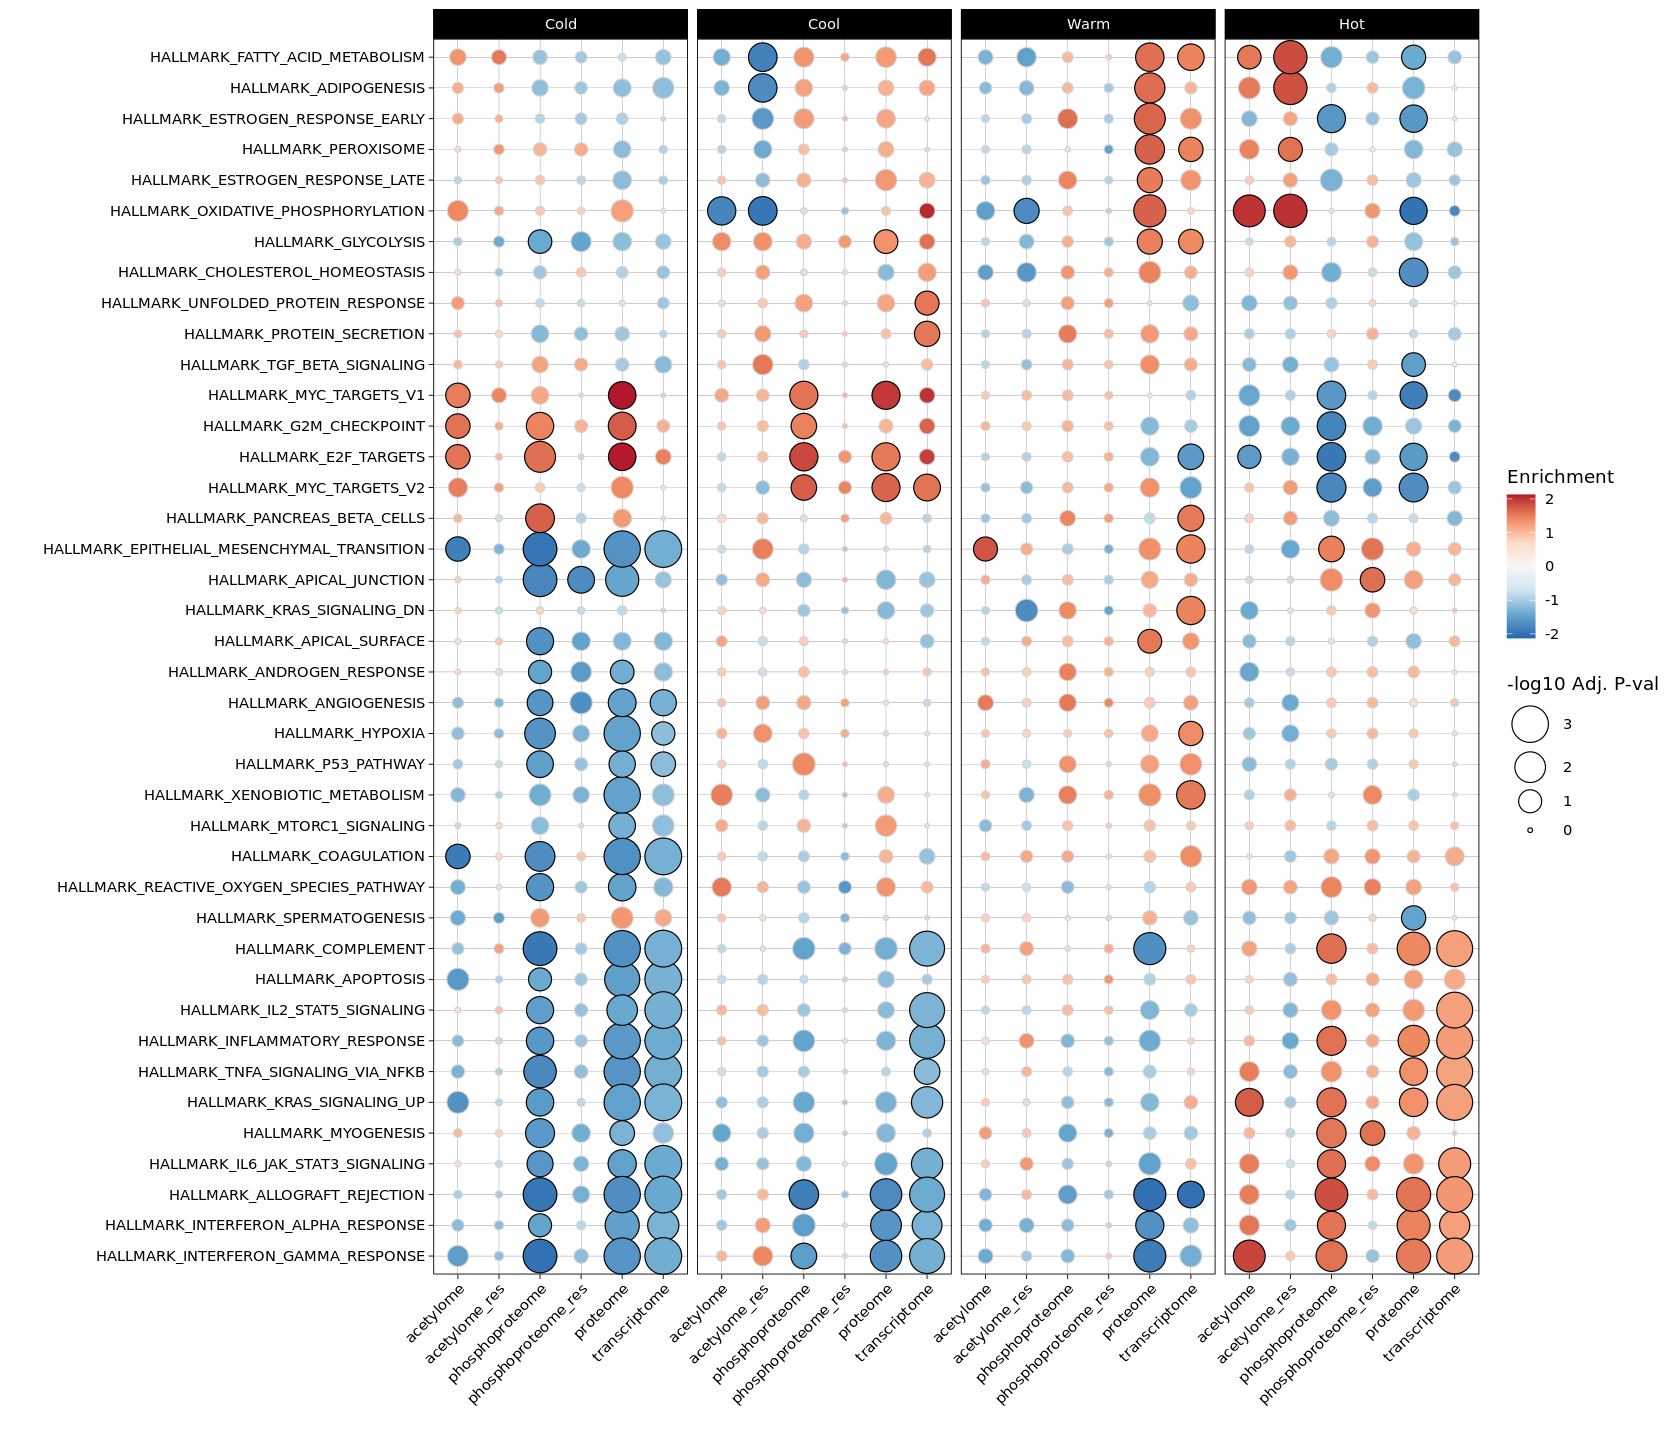

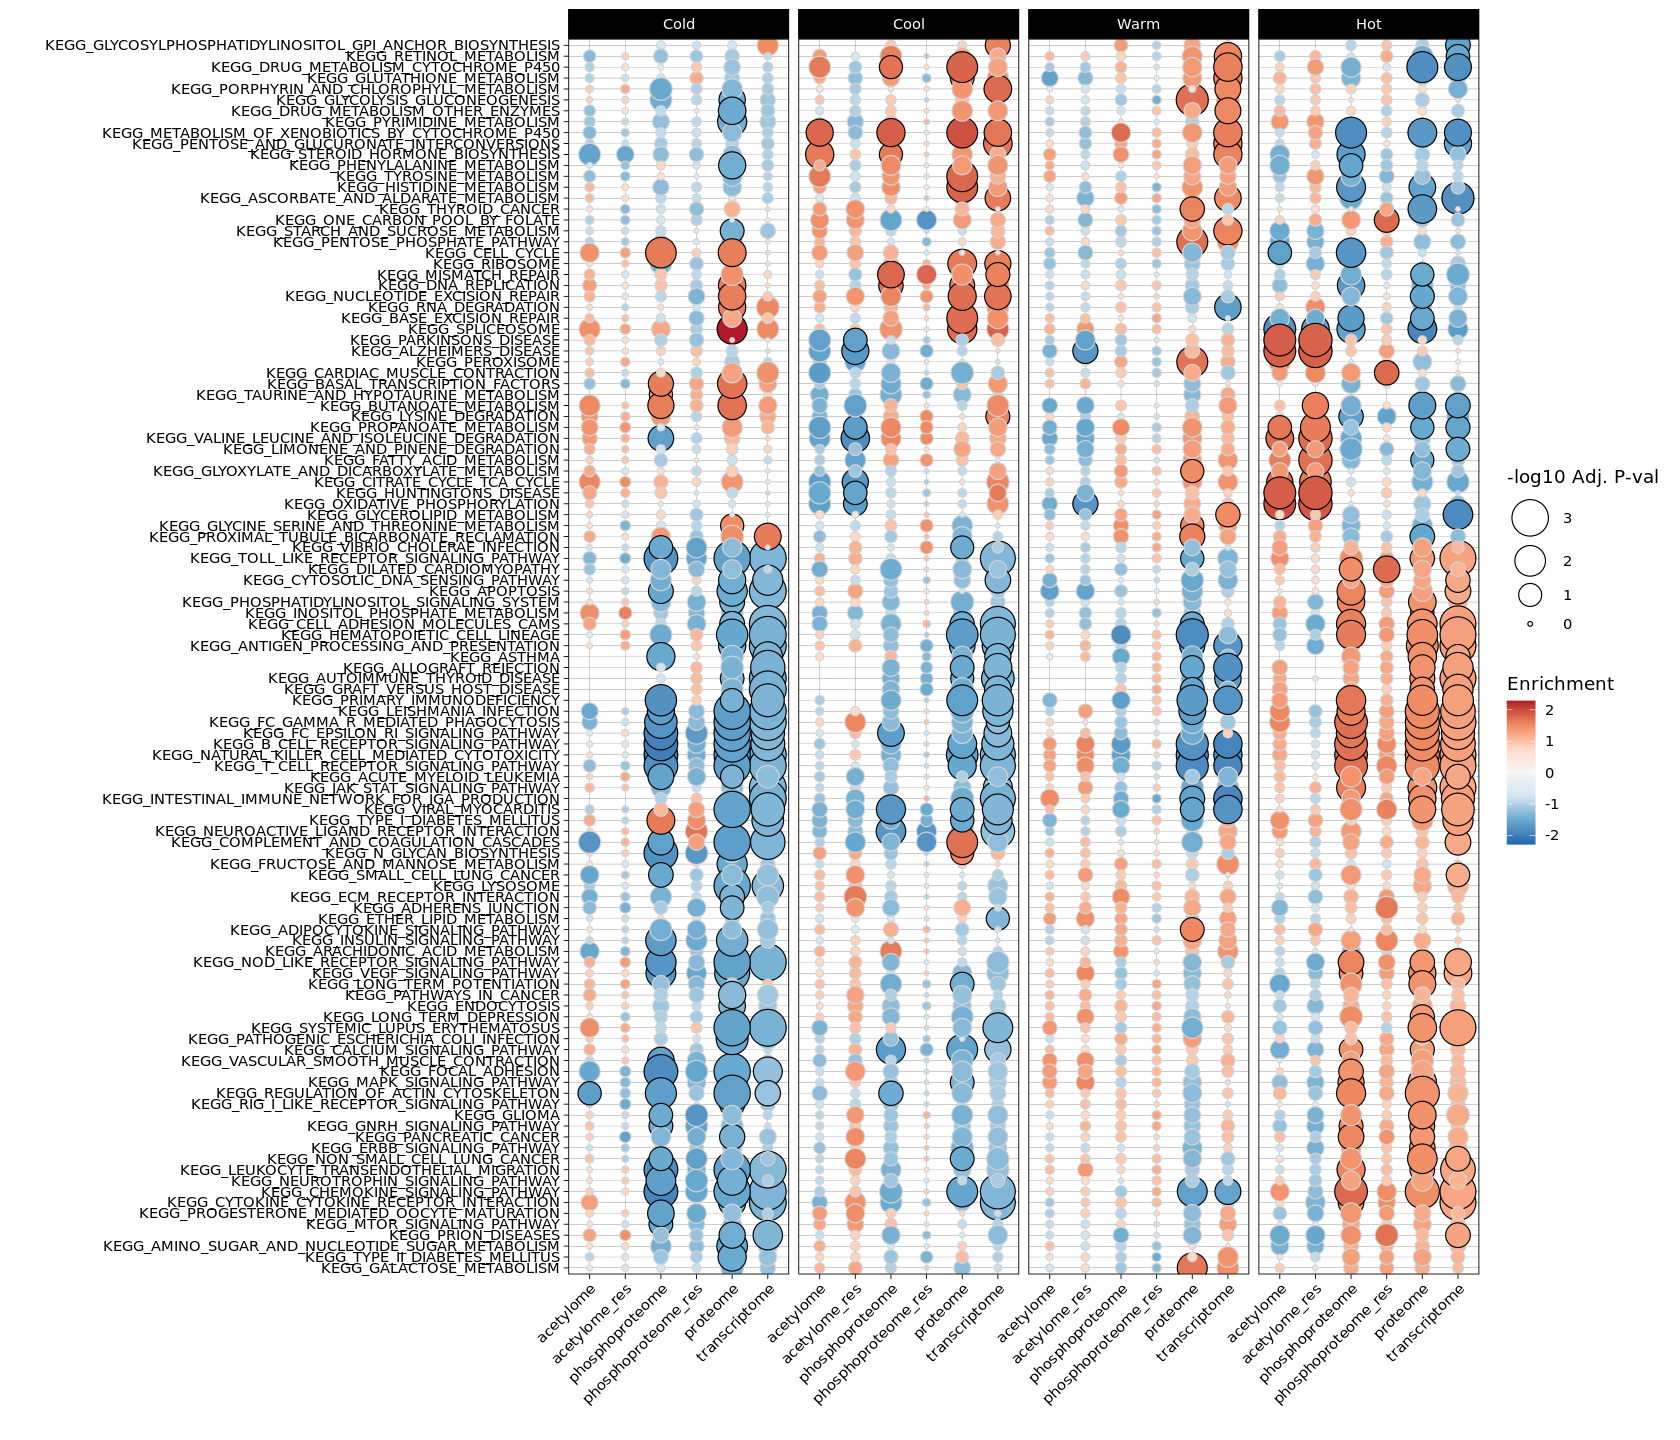

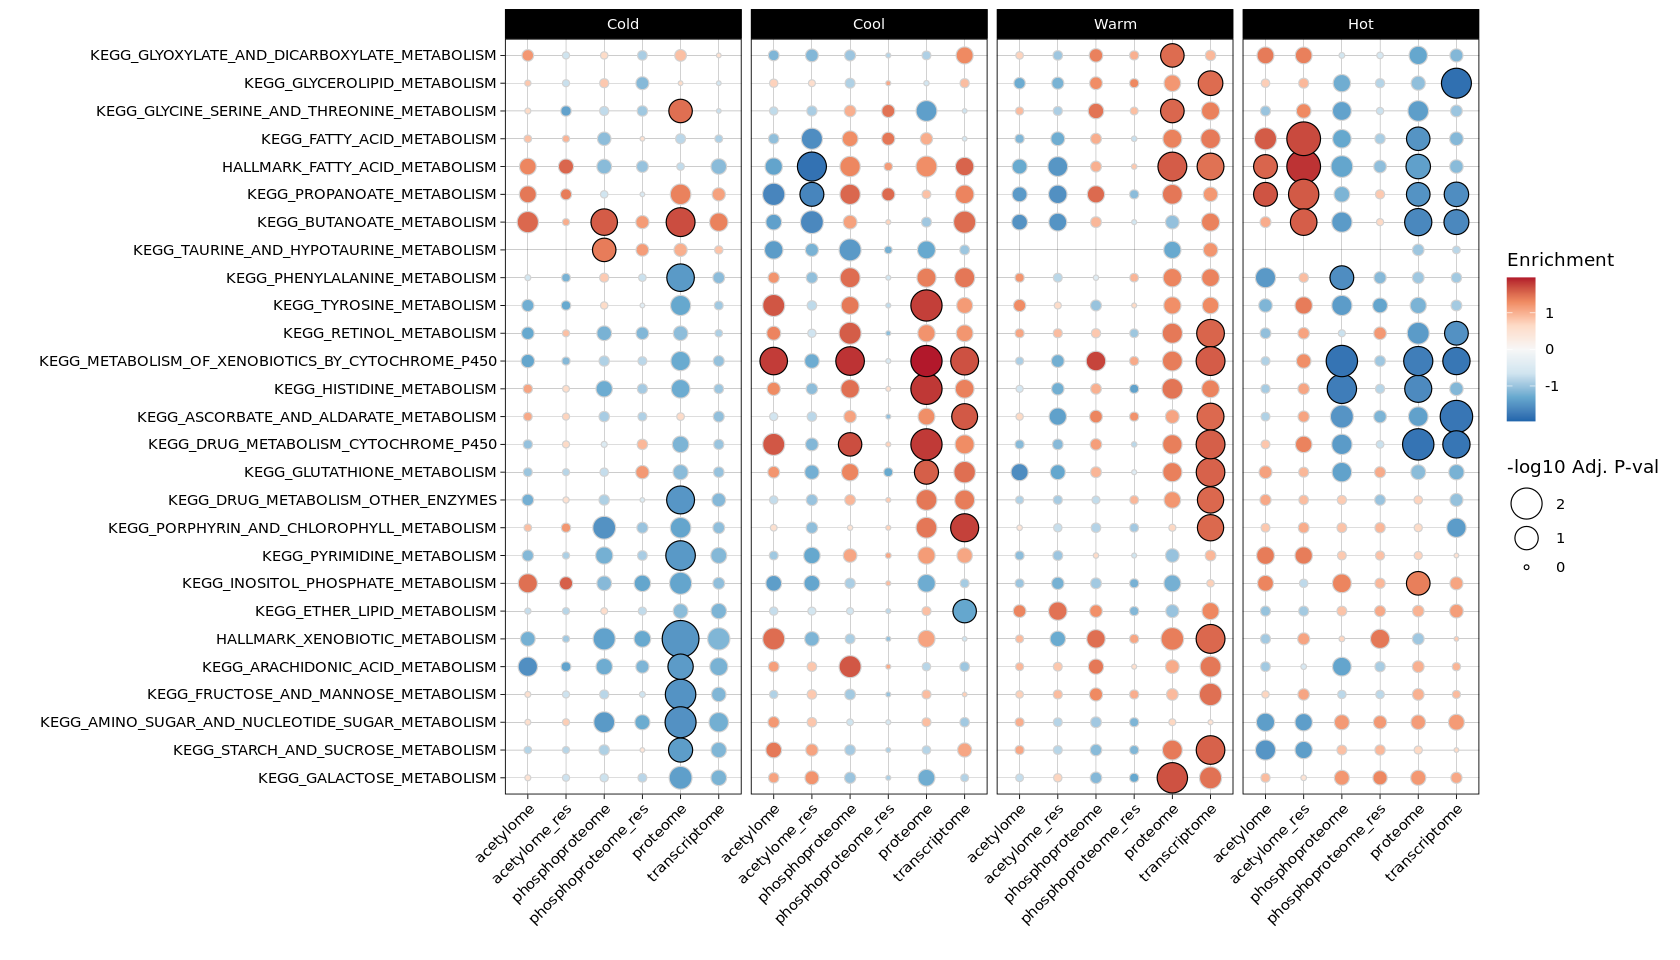

In [17]:
#pdf("figures/immune_c4_hallmark_balloon.pdf", width=14, height=12)
plotGSEA(e.c4.de.df, filter='HALLMARK', w=14, h=12)
#dev.off()

#pdf("figures/immune_c4_hallmark_balloon.pdf", width=14, height=12)
plotGSEA(e.c4.de.df, filter='KEGG', w=14, h=12)
#dev.off()

#pdf("figures/immune_c4_metab_balloon.pdf", width=14, height=8)
plotGSEA(e.c4.de.df, filter='FATTY|MET', w=14, h=8)
#dev.off()

## Figure 4b
---

In [27]:
pathways_to_plot <- strsplit("HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_TGF_BETA_SIGNALING
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_INTERFERON_ALPHA_RESPONSE
HALLMARK_INTERFERON_GAMMA_RESPONSE
HALLMARK_COMPLEMENT
HALLMARK_INFLAMMATORY_RESPONSE
HALLMARK_XENOBIOTIC_METABOLISM
HALLMARK_FATTY_ACID_METABOLISM
HALLMARK_OXIDATIVE_PHOSPHORYLATION
HALLMARK_IL2_STAT5_SIGNALING
KEGG_GLYCOLYSIS_GLUCONEOGENESIS
KEGG_PYRUVATE_METABOLISM
KEGG_PROPANOATE_METABOLISM
KEGG_BUTANOATE_METABOLISM
KEGG_BIOSYNTHESIS_OF_UNSATURATED_FATTY_ACIDS","\n")[[1]]

In [28]:
pdf("figures/immune_subtypes_fig4b_ciber.pdf", width=11, height=7)
plotGSEA(e.c4.de.df[e.c4.de.df$pathway %in% pathways_to_plot,], w=11, h=7)
dev.off()

png 
  2

## PTM-GSEA
---

In [21]:
ptm.df <- read.delim("diffexp/061721_raw_res_immune_ciber/ptmgsea_cohort_cov/phosph_de_cohort_cov-combined.tsv", sep='\t', header=T) 

In [22]:
ptm.df <- ptm.df[ptm.df$id %in% c("0_c4","1_c4","2_c4","3_c4"),]

ptm.df$id <- sapply(ptm.df$id, assignName)
ptm.df$id <- factor(ptm.df$id, levels=c("Cold","Cool","Warm","Hot"))

In [26]:
pdf("figures/immune_ciber_ptmgsea_balloon.pdf", width=6, height=12)
p <- plotPTMGSEA_v1(ptm.df, filter="KINASE", w=6, h=12)
p + theme(axis.text.x = element_text(angle = 45, hjust=1))
dev.off()

Warning message:
“Removed 3 rows containing missing values (geom_point).”


png 
  2

In [32]:
#pdf("figures/treg_ptmgsea_balloon.pdf", width=8, height=24)
#p <- plotPTMGSEA(ptm.df, filter="PATH", w=8, h=24)
#p + theme(axis.text.x = element_text(angle = 45, hjust=1))
#dev.off()

png 
  2

## Figure 4D: Differential Expression
---

In [142]:
de.df <- read.delim("diffexp/061721_raw_immune/full_de_cohort_cov.tsv", sep='\t', header=T)

In [143]:
getK <- function(x){
    return(as.character(strsplit(as.character(x),'_')[[1]][3]))
}

In [144]:
acetyl.de <- de.df[de.df$feature=='acetylome',]
acetyl.de$geneSymbol <- acetyl.de$gene_name
acetyl.de$varSite <- sapply(acetyl.de$index, getK)
acetyl.de$geneSite <- paste(acetyl.de$geneSymbol, acetyl.de$varSite, sep=" | ")

In [145]:
fa.m <- c('ACADVL', 'ACO2', 'ECHS1', 'ECH1', 'ACAA2',  'HADHB', 'DLD', 'PDHA1','LSP1','PSMB9',
          'HIST2H2BF')

In [146]:
sub.df <- acetyl.de[acetyl.de$id=="2_c4",]

In [74]:
pdf("figures/immuneCold_acetyl_volcano.pdf", width=10, height=10)
plotVolcano(
    sub.df, 
    gene.id='gene_name',
    genePTM=fa.m,
    xlim=c(-6,6),
    ylim=6.5,
    widthConnectors = 0.25,
    drawConnectors= T, 
    boxedLabels = T,
    h=10,
    w=10,
    labSize=2,
    #labvjust=1,
    #labhjust=3,
    title="Immune Cool",
    lab.pval.thresh=.1,
    legendPosition='none',
    pointSize=2
)
dev.off()

Warning message in if (!is.na(xlim)) {:
“the condition has length > 1 and only the first element will be used”


png 
  2

In [147]:
sub.df <- acetyl.de[acetyl.de$id=="0_c4",]

In [174]:
pdf("figures/immuneCool_acetyl_volcano_fig4.pdf", width=10, height=10)
plotVolcano(
    sub.df, 
    gene.id='gene_name',
    genePTM=fa.m,
    xlim=c(-3,3),
    ylim=3.75,
    widthConnectors = 0.5,
    drawConnectors= T, 
    boxedLabels = T,
    h=10,
    w=10,
    labSize=5,
    labvjust=1.5,
    labhjust=1.5,
    title="Immune Cool",
    lab.pval.thresh=0.1,
    legendPosition='none',
    pointSize=4,
    fcCut = 0
)
dev.off()

Warning message in if (!is.na(xlim)) {:
“the condition has length > 1 and only the first element will be used”


png 
  2